In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

from functools import reduce

In [2]:
mpl.rcParams['figure.figsize'] = (9, 5)

# Goal
My goal is to visualize various aspect of the `COVID-19` pandemic.

# Data sources

In this project I use data from the following sources:
- https://github.com/CSSEGISandData/COVID-19 - JHU CSSE COVID-19 Data.
- [GDP per capita PPP](https://data.worldbank.org/indicator/NY.GDP.PCAP.PP.CD) - The World Bank.
- [Population](https://data.worldbank.org/indicator/SP.POP.TOTL) - The World Bank.
- [Urban Population](https://data.worldbank.org/indicator/SP.URB.TOTL.IN.ZS) - The World Bank.
- [Population living in slums](https://data.worldbank.org/indicator/EN.POP.SLUM.UR.ZS) - The World Bank.
- [Rural population](https://data.worldbank.org/indicator/SP.RUR.TOTL.ZS) - The World Bank.
- [Life expectancy at birth](https://data.worldbank.org/indicator/SP.DYN.LE00.IN) - The World Bank.
- [Current healthcare expenditure](https://data.worldbank.org/indicator/SH.XPD.CHEX.GD.ZS) - The World Bank.
- https://datahub.io/JohnSnowLabs/country-and-continent-codes-list - country codes and continents.

# Data loading

In [3]:
merged = pd.read_csv('./data/cleaned/merged.csv')

# Socioeconomic data

We proceed to visually inspect the relationship between the `COVID-19` dataset and data downloaded from the World Bank. Given that the `Population` column varies wildy we choose a different metric to make comparisons.

In [4]:
figsize = (5, 5)

In [5]:
economic = merged.copy()

economic['Cases Per Milion'] = economic['Confirmed'] / (economic['Population'] /  10**6)
economic['Cases Per Milion'] = economic['Cases Per Milion'].round(2)

economic['Deaths Per Milion'] = economic['Deaths'] / (economic['Population'] /  10**6)
economic['Deaths Per Milion'] = economic['Deaths Per Milion'].round(2)

economic = economic.drop(['Lat', 'Long', 'Country Code', 'Continent'], axis=1)
economic.head()

,Country,Confirmed,Recovered,Deaths,Active,Mortality,Life Expectancy,GDP Per Capita,Population,Urban Population %,Slum Population %,Rural Population %,GDP Healthcare %,Cases Per Milion,Deaths Per Milion
0,Afghanistan,39186.0,32619.0,1451.0,5116.0,3.70,64.49,2293.55,38041754.0,25.75,62.7,74.25,11.78,1030.08,38.14
1,Albania,13045.0,7309.0,373.0,5363.0,2.86,78.46,14495.08,2854191.0,61.23,NaN,38.77,NaN,4570.47,130.69
2,Algeria,50754.0,35654.0,1707.0,13393.0,3.36,76.69,11820.09,43053054.0,73.19,11.8,26.81,6.37,1178.87,39.65
3,Andorra,1836.0,1263.0,53.0,520.0,2.89,NaN,NaN,77142.0,87.98,NaN,12.02,10.32,23800.26,687.04
4,Angola,4590.0,1554.0,167.0,2869.0,3.64,60.78,6929.68,31825295.0,66.18,55.5,33.82,2.79,144.22,5.25


In [6]:
economic.sort_values('Mortality', ascending=False).head()

,Country,Confirmed,Recovered,Deaths,Active,Mortality,Life Expectancy,GDP Per Capita,Population,Urban Population %,Slum Population %,Rural Population %,GDP Healthcare %,Cases Per Milion,Deaths Per Milion
180,Yemen,2029.0,1255.0,587.0,187.0,28.93,66.10,3688.52,29161922.0,37.27,60.8,62.73,4.23,69.58,20.13
83,Italy,306235.0,222716.0,35801.0,47718.0,11.69,83.35,44196.69,60297396.0,70.74,NaN,29.26,8.84,5078.74,593.74
110,Mexico,720858.0,609041.0,75844.0,35973.0,10.52,74.99,20410.71,127575529.0,80.44,11.1,19.56,5.52,5650.44,594.50
179,Western Sahara,10.0,8.0,1.0,1.0,10.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
174,United Kingdom,425767.0,2303.0,42025.0,381439.0,9.87,81.26,48709.70,66834405.0,83.65,NaN,16.35,9.63,6370.48,628.79


## GDP Healthcare
We compare the percentage of gdp spent on healthcare with cases per milion.

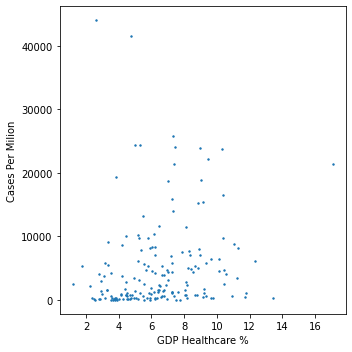

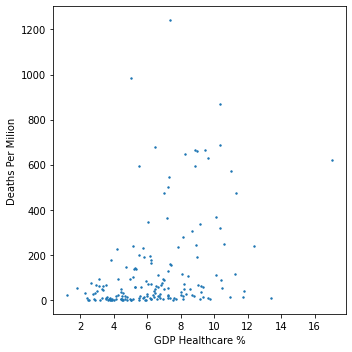

In [7]:
cols = ['Cases Per Milion', 'Deaths Per Milion']

for col in cols:
    plt.figure(figsize=figsize)
    plt.scatter(economic['GDP Healthcare %'], economic[col], s=2)
    plt.xlabel('GDP Healthcare %')
    plt.ylabel(f'{col}')
    plt.tight_layout()
    plt.show()

## Population

We compare the proportion of people living in different areas to the mortality rate.

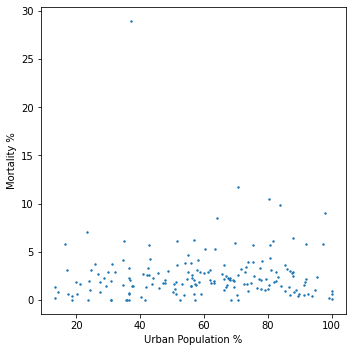

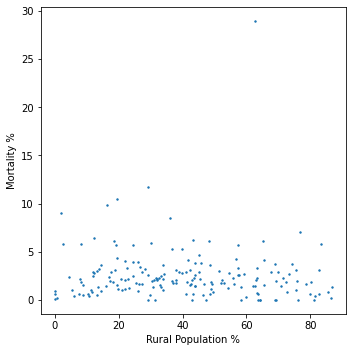

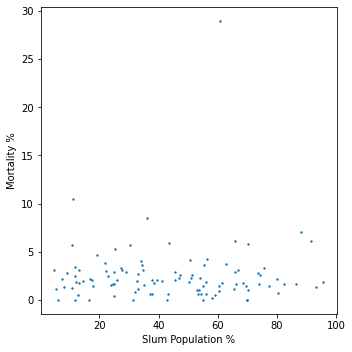

In [8]:
cols = ['Urban Population %', 
        'Rural Population %', 
        'Slum Population %']

for col in cols:
    plt.figure(figsize=figsize)
    plt.scatter(economic[col], economic['Mortality'], s=2)
    plt.ylabel('Mortality %')
    plt.xlabel(f'{col}')
    plt.tight_layout()
    plt.show()

## GDP & Healthcare
We compare life expectancy, healthcare spending and gdp per capita to the mortality rate.

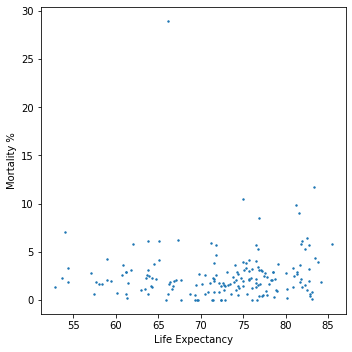

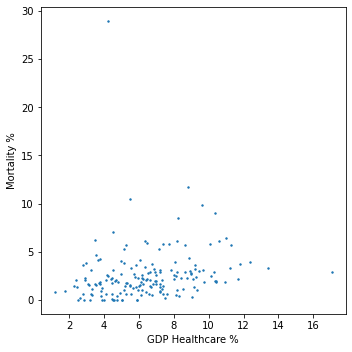

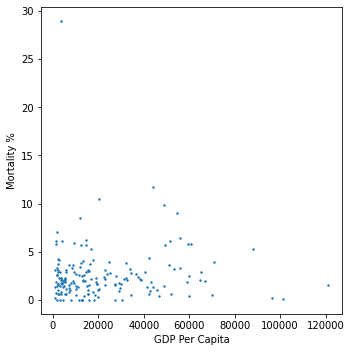

In [9]:
cols = ['Life Expectancy', 'GDP Healthcare %', 'GDP Per Capita']

for col in cols:
    plt.figure(figsize=figsize)
    plt.scatter(economic[col], economic['Mortality'], s=2)
    plt.ylabel('Mortality %')
    plt.xlabel(f'{col}')
    plt.tight_layout()
    plt.show()